In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/disney/disney.csv


> it compares descriptions of titles in a DataFrame, identifying pairs with similarity ratios above 0.60. It creates a DataFrame containing these similar title pairs along with their descriptions and similarity scores.

 # Listing files to make sure our file is imported

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


> The script below imports a few of the most commonly used libraries in data science. These include pandas for data manipulation, numpy for numerical computations, matplotlib for plotting, and seaborn for statistical plotting. The library sets the plotting style to ‘ggplot’, which ensures that all plots are formatted with a similar visual theme. The selected libraries are commonly used to facilitate data analysis and plotting exercises, offering a robust set of tools for exploring and plotting data.

# Importing all libraries we're going to use, and reading the data 

In [4]:
df = pd.read_csv('/kaggle/input/disney/disney.csv')

> putting the data in variable code df

# Understanding the data (Shape , Values)

In [5]:
df.shape

(1450, 12)

> Dataframe size:(rows,columns)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


> Preview DataFrame's top rows.

In [7]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


> Last Dataframe rows

# Understanding the types of our data 

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

> Data types of Dataframe columns.

# Cleaning the data 
*                      removing all columns that we'll not use

In [9]:
df = df[['show_id', 'type', 'title', 'director', 'cast',
       'date_added', 'duration', 'listed_in', 'description']]

> Selecting specific columns from DataFrame.

In [10]:
df

,show_id,type,title,director,cast,date_added,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...","November 26, 2021",23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale","November 26, 2021",91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...","November 26, 2021",23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...","November 26, 2021",41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...","November 25, 2021",1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","June 4, 2021",108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","April 2, 2021",106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","December 18, 2020",107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","September 18, 2020",112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


> Printing the DataFrame.

# The data left that will be used 

 # 1_Top 5 des meilleures catégories.

In [11]:
df

,show_id,type,title,director,cast,date_added,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...","November 26, 2021",23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale","November 26, 2021",91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...","November 26, 2021",23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...","November 26, 2021",41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...","November 25, 2021",1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","June 4, 2021",108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","April 2, 2021",106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","December 18, 2020",107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","September 18, 2020",112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


> df equivalent print df

* **Treating the row 'listed_in' as a string to separate each category by itself then adding it to a new row using the funtion explode()**

In [12]:
df['listed_in'] = df['listed_in'].astype(str)
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(','))
df_cat = df.explode('listed_in')
print(df_cat.head())



  show_id   type                                             title  \
0      s1  Movie  Duck the Halls: A Mickey Mouse Christmas Special   
0      s1  Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2  Movie                            Ernest Saves Christmas   
2      s3  Movie                      Ice Age: A Mammoth Christmas   
2      s3  Movie                      Ice Age: A Mammoth Christmas   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
2                       Karen Disher   

                                                cast         date_added  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...  November 26, 2021   
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...  November 26, 2021   
1           Jim Varney, Noelle Parker, Douglas Seale  November 26, 2021   
2  Raymond Albert Romano, John Leguiza

The listed_in column gets converted to strings. The code then splits strings by commas for each entry using the split() function. The DataFrame is also exploded, producing multiple rows for each listed_in entry in one row.  the head of the resulting dataframe, df_cat is printed. It appears that this code transforms a column that contains categories separated by commas into a format where each category has a separate row, which is often desirable for analysis or plotting.

In [13]:
df_cat

,show_id,type,title,director,cast,date_added,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...","November 26, 2021",23 min,Animation,Join Mickey and the gang as they duck the halls!
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...","November 26, 2021",23 min,Family,Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale","November 26, 2021",91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...","November 26, 2021",23 min,Animation,Sid the Sloth is on Santa's naughty list.
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...","November 26, 2021",23 min,Comedy,Sid the Sloth is on Santa's naughty list.
...,...,...,...,...,...,...,...,...,...
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","September 18, 2020",112 min,Comedy,Despite the wishes of their traditional famili...
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","September 18, 2020",112 min,Coming of Age,Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,"April 1, 2020",2 min,Action-Adventure,View one of Sparky's favorite home movies.
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,"April 1, 2020",2 min,Animals & Nature,View one of Sparky's favorite home movies.


> df_cat new Dataframe containing exploded version of category

* **Counting the values of each category alone using value_counts() then listing the top 5 categories using head(5)**

In [14]:
df_cat['listed_in'] = df_cat['listed_in'].str.strip()
top_categories = df_cat['listed_in'].value_counts().head(5)
print("Top 5 des meilleures catégories :")
print(top_categories)

Top 5 des meilleures catégories :
listed_in
Family              632
Animation           542
Comedy              526
Action-Adventure    452
Animals & Nature    208
Name: count, dtype: int64


>  It selects the top 5 most frequent categories and prints them out

* **Droping duplicates**

In [15]:
top_categories = top_categories.drop_duplicates()
print(top_categories.head(5))



listed_in
Family              632
Animation           542
Comedy              526
Action-Adventure    452
Animals & Nature    208
Name: count, dtype: int64


> top_categories = top_categories.drop_duplicates()
print(top_categories.head(5))

* **Visualising the data using seaborn & matplotlib**

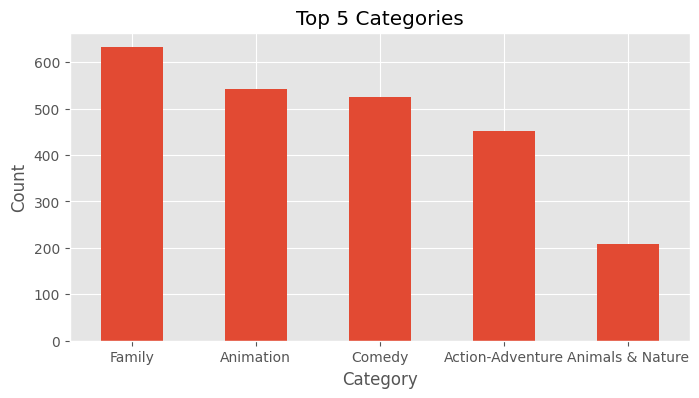

In [16]:
plt.figure(figsize=(8, 4))
top_categories.plot(kind='bar')
plt.title('Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

> it generates a bar plot using matplotlib to visualize the top 5 categories from the 'top_categories' Series. It sets the figure size, specifies the plot type as 'bar', adds a title and labels for the x and y axes, and rotates the x-axis labels

It specifies the figure size, sets the plot type to 'bar', and adds a title, labels for the x and y axes, and rotates the x-axis labels for better readability.

# 2_Top 5 des réalisateurs

* **Separating the directors**

In [17]:
df_filtered = df.dropna(subset=['director'])
df_filtered['director'] = df_filtered['director'].astype(str)
df_filtered['director'] = df_filtered['director'].apply(lambda x: x.split(','))
df_dir = df_filtered.explode('director')

/tmp/ipykernel_33/2646085429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['director'] = df_filtered['director'].astype(str)
/tmp/ipykernel_33/2646085429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['director'] = df_filtered['director'].apply(lambda x: x.split(','))


> it filters out rows with missing values in the 'director' column, then converts the 'director' column to strings and splits each string by commas. and it explodes the DataFrame

* **Counting the directors realisations**

In [18]:
df_dir['director'] = df_dir['director'].str.strip()
top_directors = df_dir['director'].value_counts().head(5)
print("Top 5 des meilleures réalisateurs :")
print(top_directors)

Top 5 des meilleures réalisateurs :
director
Jack Hannah         17
John Lasseter       16
Wilfred Jackson     16
Paul Hoen           16
Robert Stevenson    13
Name: count, dtype: int64


> It selects the top 5 most frequent directors and prints them out, indicating the most prolific directors in the dataset

* **Visualisation**

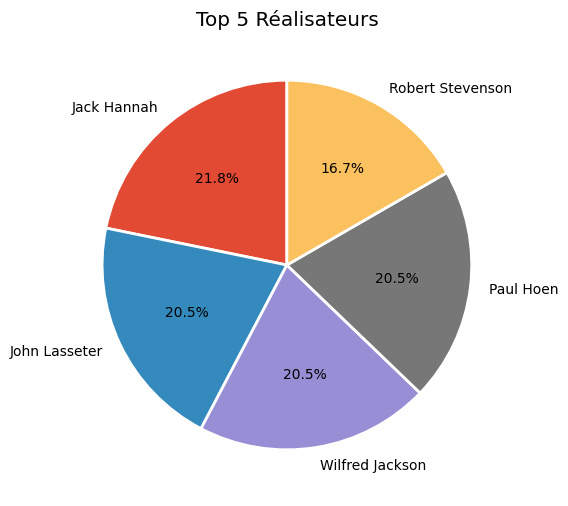

In [19]:
plt.figure(figsize=(8, 6))
plt.title('Top 5 Réalisateurs')
sns.set_palette('bright')
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.show()

> it generates a pie chart using seaborn and matplotlib to show the distribution of the top 5 directors. It then sets figure size, title, and color palette before plotting the pie chart including director name labels and #% contribution that begins the chart at 90 degrees and it displays the plot.

# 3_Les dix meilleurs acteurs

* **Separating actors**

In [20]:
df_filtered2 = df.dropna(subset=['cast'])
df_filtered2['cast'] = df_filtered2['cast'].astype(str)
df_filtered2['cast'] = df_filtered2['cast'].apply(lambda x: x.split(','))
df_act = df_filtered2.explode('cast')

/tmp/ipykernel_33/3987643810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2['cast'] = df_filtered2['cast'].astype(str)
/tmp/ipykernel_33/3987643810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2['cast'] = df_filtered2['cast'].apply(lambda x: x.split(','))


> it filters out rows with missing values in the 'cast' column, then converts the 'cast' column to strings and splits each string by commas and it explodes the DataFrame, creating multiple rows for each actor associated with a movie or show. and then, 'df_act', likely contains individual rows for each actor, allowing for analysis or visualization based on cast members.

* **Counting actors**

In [21]:
df_act['cast'] = df_act['cast'].str.strip()
top_actors = df_act['cast'].value_counts().head(10)
print("Top 10 des meilleures acteurs :")
print(top_actors)

Top 10 des meilleures acteurs :
cast
Jim Cummings           33
Walt Disney            20
Larry the Cable Guy    19
Bill Farmer            18
Keith Ferguson         16
Tress MacNeille        16
Corey Burton           16
Pinto Colvig           15
Bob Peterson           15
Jeff Bennett           15
Name: count, dtype: int64


> trims whitespace from each actor's name in the 'cast' column, then counts the occurrences of each unique actor using value_counts(). It selects the top 10 most frequent actors and prints them out, indicating the most prolific actors in the dataset.

* **Visualisation*** 

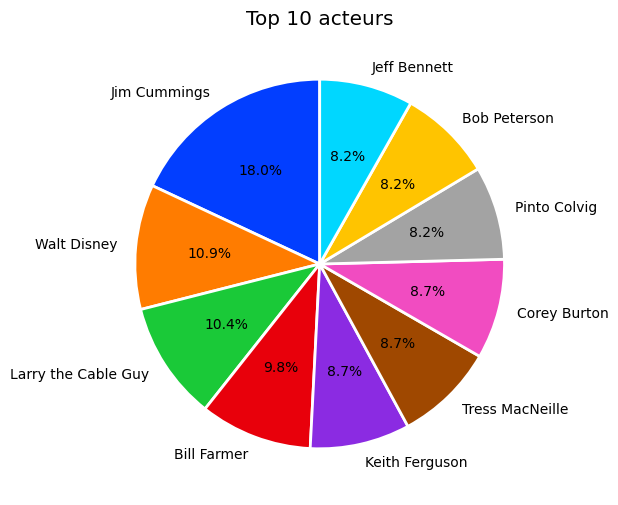

In [22]:
plt.figure(figsize=(8, 6))
plt.title('Top 10 acteurs')
sns.set_palette('bright')
plt.pie(top_actors, labels=top_actors.index, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.show()

> itgenerates a pie chart using seaborn and matplotlib to visualize the distribution of the top 10 actors. It sets the figure size, title, and color palette, then plots the pie chart with labels showing actor names and percentages of their contribution, starting the chart at a 90-degree angle. Finally, it displays the plot.

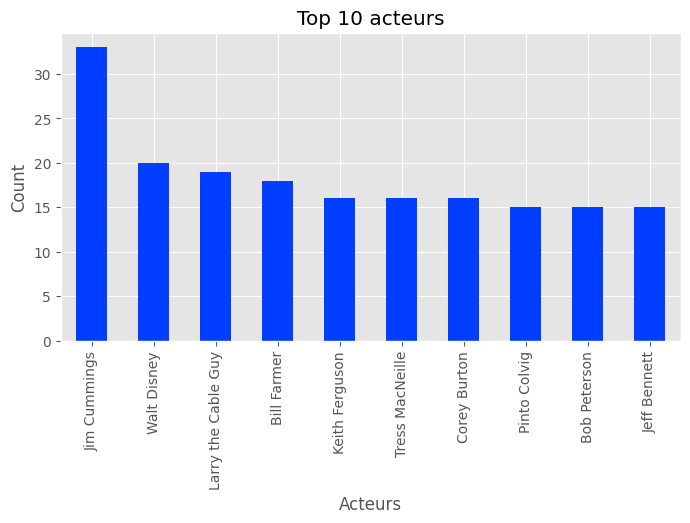

In [23]:
plt.figure(figsize=(8, 4))
top_actors.plot(kind='bar')
plt.title('Top 10 acteurs')
plt.xlabel('Acteurs')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

> it generates a bar plot using matplotlib to visualize the top 10 actors. It sets the figure size, specifies the plot type as 'bar', adds a title, and labels for the x and y axes. It rotates the x-axis labels by 90 degrees

# 4_Les cinq meilleures séries télévisées avec le plus grand nombre de saisons.

* **gathering tv-shows only**

In [24]:
tv_shows = df[df["type"] == "TV Show"]
tv_shows

,show_id,type,title,director,cast,date_added,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...","November 25, 2021",1 Season,"[Docuseries, Historical, Music]",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...","November 24, 2021",1 Season,"[Action-Adventure, Superhero]",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...","November 24, 2021",2 Seasons,"[Docuseries, Reality, Survival]",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...","November 24, 2021",2 Seasons,"[Animals & Nature, Docuseries, Family]",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",NaN,"Dr. Michelle Oakley, Zachary Fine","November 17, 2021",10 Seasons,"[Action-Adventure, Animals & Nature, Docuser...","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...
1417,s1418,TV Show,X-Men: Evolution,NaN,"Noel Fisher, Vincent Gale, Christopher Judge, ...","November 12, 2019",4 Seasons,"[Action-Adventure, Animation, Kids]",X-Men: Evolution features the team as teenager...
1434,s1435,TV Show,Smart Guy,NaN,"Tahj Mowry, John Jones, Jason Weaver, Essence ...","October 1, 2019",3 Seasons,"[Comedy, Coming of Age, Kids]",A genius tries to fit in as a high school soph...
1439,s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",NaN,3 Seasons,"[Action-Adventure, Comedy, Coming of Age]",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",NaN,2 Seasons,"[Action-Adventure, Comedy, Science Fiction]",Ryan discovers his ability to control a giant ...


> it filters the DataFrame 'df' to include only rows where the "type" column equals "TV Show", thereby selecting only the TV shows from the dataset. The resulting DataFrame, 'tv_shows', likely contains information exclusively about TV shows, such as titles, directors, cast

* **Knowing their shape**

In [25]:
tv_shows.shape

(398, 9)

>  it retrieves the shape of the DataFrame 'tv_shows', indicating the number of rows and columns in the DataFrame. Since 'tv_shows' contains only TV shows from the original DataFrame, this shape represents the size of the subset of TV shows within the dataset.

* **398 tv-show**

* **Cleaning the data as wanted (removing "seasons" and converting numbers to int)**

In [26]:
season = tv_shows.groupby("title")["duration"].max().reset_index()
season["duration"] = season["duration"].str.replace(" Season", "")
season["duration"] = season["duration"].str.replace("s", "")
season["duration"] = season["duration"].astype(int)


>  it shows by title and retrieves the maximum duration for each show. It then removes the "Season" and "s" strings from the 'duration' column, converting the values to integers. 

* **Counting duration**

In [27]:
top_tv_shows= season.sort_values("duration", ascending=False).head(5)
top_tv_shows

,title,duration
353,The Simpsons,32
340,The Incredible Dr. Pol,19
193,Life Below Zero,16
121,"Dr. Oakley, Yukon Vet",10
380,Wicked Tuna,10


> it identifies and retrieves the top 5 TV shows with the longest durations from the dataset.

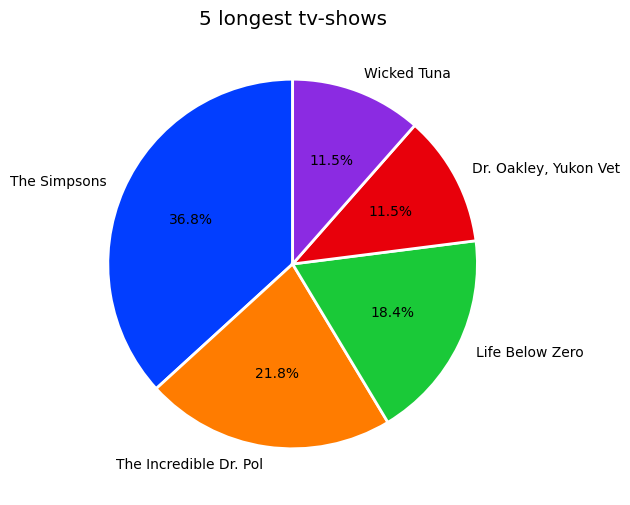

In [28]:
plt.figure(figsize=(8, 6))
plt.title('5 longest tv-shows')
sns.set_palette('bright')
plt.pie(top_tv_shows["duration"], labels=top_tv_shows["title"], autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.show()

> it visualizes the distribution of durations for the top 5 longest TV shows using a pie chart.

# 6_Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles

In [32]:
import itertools
from difflib import SequenceMatcher

In [33]:
similarities = []

df = df.dropna(subset=["description"])
for (title1, desc1), (title2, desc2) in itertools.combinations(df[["title", "description"]].itertuples(index=False), 2):
    similarity_ratio = SequenceMatcher(None, desc1, desc2).ratio()
    if similarity_ratio > 0.60:
        similarities.append((title1, desc1, title2, desc2, similarity_ratio))

similarities_df = pd.DataFrame(similarities, columns=["Title 1", "Description 1", "Title 2", "Description 2", "Similarity Ratio"])

similarities_df

,Title 1,Description 1,Title 2,Description 2,Similarity Ratio
0,Obi-Wan Kenobi,"A behind the scenes look of the ""Obi-Wan Kenob...",Willow,Meet the cast of the all-new Disney+ fantasy-a...,0.605128
1,The Making of Happier Than Ever: A Love Letter...,"Go behind the scenes of ""Happier Than Ever: A ...",Happier Than Ever: A Love Letter to Los Angeles,"Billie Eilish makes her Disney+ debut with ""Ha...",0.694611
2,Mickey's Tale of Two Witches,Mickey tells a tale of two witches-in-training!,Once Upon a Time in Wonderland,Alice tells a tale of a strange new land.,0.613636
3,Ready for Preschool,The love of learning begins with Disney Junior!,Disney Junior Music Nursery Rhymes,Nursery Rhymes re-imagined with Disney Junior!,0.602151
4,Big City Greens,The Green family moves from the country to Big...,101 Dalmatians (Series),The Dearly Family move to a new farm home in t...,0.623853
...,...,...,...,...,...
441,The Wise Little Hen,Donald Duck learns that you must work for a ha...,Three Blind Mouseketeers,Captain Katt sets traps for the Three Mouseket...,0.606452
442,The Wise Little Hen,Donald Duck learns that you must work for a ha...,Trailer Horn,Donald heads out for a nice relaxing camping t...,0.649351
443,Three Blind Mouseketeers,Captain Katt sets traps for the Three Mouseket...,Three Little Pigs,A Disney telling of the Three Little Pigs. See...,0.620690
444,Toy Story,"Meet Woody, Buzz and the gang in an adventure ...",Toy Story 3,"Woody, Buzz and the gang return for more adven...",0.618705


> it identifies and stores pairs of titles with similar descriptions along with their similarity ratios in a DataFrame for further analysis.

# 7_Disney se concentre-t-il d'avantage sur les séries télévisées que sur les films ces dernières années ?

In [ ]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
df_type = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
df_type

>  it categorizes the dataset by year of addition and type (Movie or TV Show), providing a tabulated view of how the number of additions varies over the years for each type of content.

* **Visualisation**

In [ ]:
plt.figure(figsize=(10, 6))
df_type.plot(kind='bar', stacked=True)
plt.title("Nombre de séries télévisées et de films ajoutés par année")
plt.xlabel("Année")
plt.ylabel("Nombre de contenus ajoutés")
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

>it visualizes the yearly additions of TV shows and movies through a stacked bar plot, enabling easy comparison of the contribution of each type over time.

**Apres visualisation on constate qu'effectivement Disney se concentre sur les films ces dernieres annees plutot que les series**